# Part II - Prosper loan data Explanatory
## by Jayaseeli

## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook (i.e., an executive summary). This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> **Rubric Tip**: The key insights listed here should match those documented at the conclusion of the exploratory analysis notebook. 

Wherever risk is high returns also high, that echoes in lending business whenever they have high risk customer they will charge them more to balance the risk they take. Owning home doesn't mean they have high credit score, but due to underlying security they do get loans at lower interest rate than non home owners.

   Income range does affect the loan amount they receive, low income people get less loan amount. Here in our dataset most of the borrowers are employed and have medium credit risk.Interest rate increased till 2011, then it declines. Due to decrease in interest rate, volume of loan disbursement increased in 2013.

## Dataset Overview and Executive Summary

> Briefly introduce your dataset here. Include a summary of findings that your visualizations will support.

> **Rubric Tip**: The key insights can be in a bulleted or numbered list for ease of review.
Dataset contains loan information from prosper, having 113937 rows of loan listings with 81 columns. It features columns like 'LoanStatus', 'ClosedDate','BorrowerAPR','BorrowerRate','Occupation', 'CreditScoreRangeLower',EmploymentStatus','DebtToIncomeRatio',IncomeRange', 'TotalProsperLoans','MonthlyLoanPayment'.
Data Dictionary:

https://docs.google.com/spreadsheets/d/1k60B40cr0YAR51X8dmqLGyYBqKzN80Vm2Pnxx3GtHcw/edit?usp=sharing

Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than USD 12 billion in loans to more than 770,000 people. Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan between USD 2,000 and USD 40,000. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors. (source: https://www.prosper.com/about)

Following are some of the key points or questions I am looking for in the dataset.
Problem statement:

    1. Does owning home impacts borrowers eligibility of loan amount, interest rate irrespective of their credit score and income range?
    2. Is there change in borrower rate over the period?
    3. Does income has any association with interest rate?

Key Insights:
 - Owning home doesn't mean they have high credit score, but due to underlying security they do get loans at lower interest rate compare to non home owners.
 - Having low credit risk doesn't mean they always get high loan amount
 - There is change in ave.interest rate over period of time, 2011 being high then it reduces steeply thus improved number of loan disbursement

In [39]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [40]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('cleaned_prosper.csv',)
pd.set_option('display.max_columns', 85) # to display all columns when viewing data
pd.set_option('display.max_rows', None) # to display all rows in the output
df.drop(columns='index',inplace=True)
df.tail()

,ListingNumber,Term,LoanStatus,BorrowerAPR,ClosedDate,LenderYield,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,Year,CreditRisk
113059,753087,36,Current,0.22354,NaN,0.1764,1,IL,Food Service Management,Employed,True,700,0.13,"$50,000-74,999",True,4333,0,10000,2013-04-22,Q2 2013,364,2013,Medium
113060,537216,36,FinalPaymentInProgress,0.13220,NaN,0.1010,7,PA,Professional,Employed,True,700,0.11,"$75,000-99,999",True,8041,0,2000,2011-11-07,Q4 2011,65,2011,Medium
113061,1069178,60,Current,0.23984,NaN,0.2050,1,TX,Other,Employed,True,700,0.51,"$25,000-49,999",True,2875,0,10000,2013-12-23,Q4 2013,273,2013,Medium
113062,539056,60,Completed,0.28408,2013-08-13,0.2505,2,GA,Food Service,Full-time,True,680,0.48,"$25,000-49,999",True,3875,0,15000,2011-11-21,Q4 2011,449,2011,Medium
113063,1140093,36,Current,0.13189,NaN,0.0939,1,NY,Professor,Employed,False,680,0.23,"$50,000-74,999",True,4583,0,2000,2014-01-21,Q1 2014,64,2014,Medium


### Question : 1

#### Does owning home impacts borrowers eligibility of loan amount, interest rate irrespective of their credit score and income range?

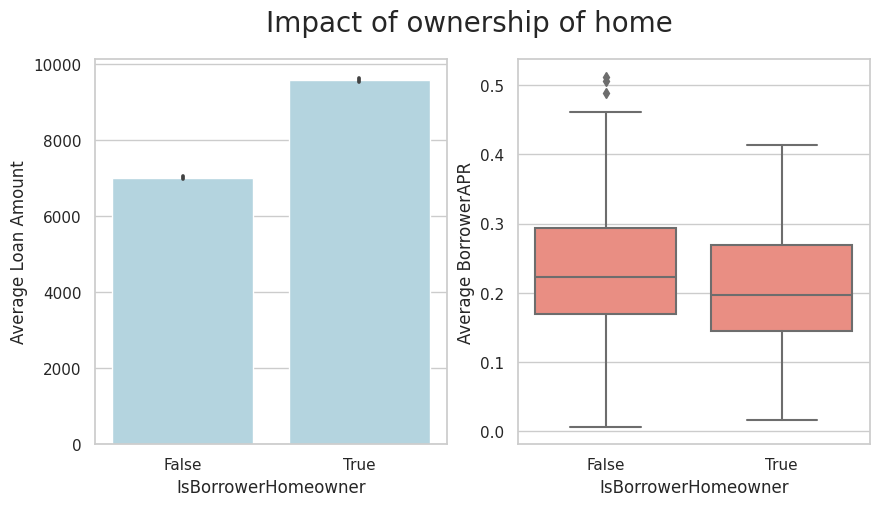

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.set_theme(style="whitegrid")
sns.barplot(data=df,x='IsBorrowerHomeowner',y='LoanOriginalAmount',color='lightblue')
#plt.title('Average Loan Amount')
plt.xlabel('IsBorrowerHomeowner')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=0);

plt.subplot(1,2,2)
sns.boxplot(data=df,x='IsBorrowerHomeowner',y='BorrowerAPR',color='salmon')
plt.xlabel('IsBorrowerHomeowner')
plt.ylabel('Average BorrowerAPR')
plt.xticks(rotation=0);
plt.suptitle('Impact of ownership of home',size=20);

<Figure size 1000x800 with 0 Axes>

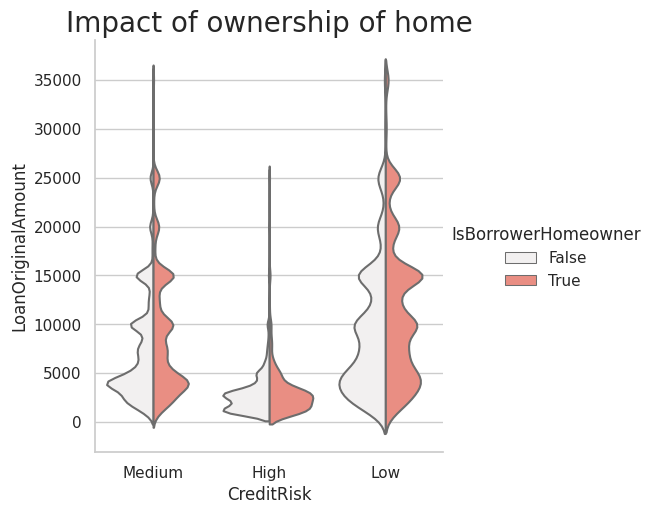

In [42]:
plt.figure(figsize=(10,8));
sns.catplot(x="CreditRisk", y="LoanOriginalAmount", hue="IsBorrowerHomeowner",
            kind="violin", inner=None, split=True,color='salmon', data=df);
plt.title('Impact of ownership of home',size=20);

## Question: 2

#### Is there change in borrower rate over the period?

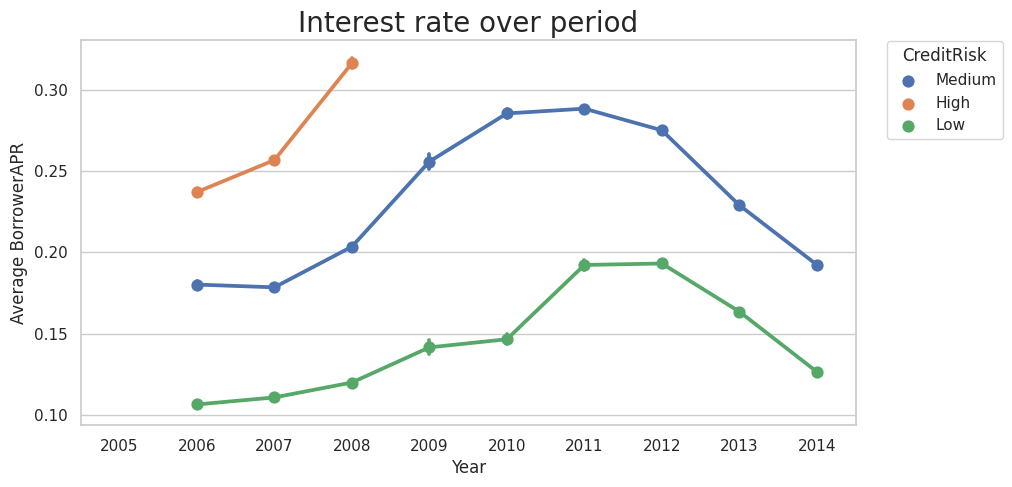

In [43]:
plt.figure(figsize=(10,5))

sns.pointplot(data=df,x='Year',y='BorrowerAPR',hue='CreditRisk')
plt.ylabel('Average BorrowerAPR')
plt.title('Interest rate over period',size=20)
plt.legend(loc='right',title='CreditRisk',bbox_to_anchor=(1.2,0.87));

## Question: 3

#### Does income has any association with interest rate?

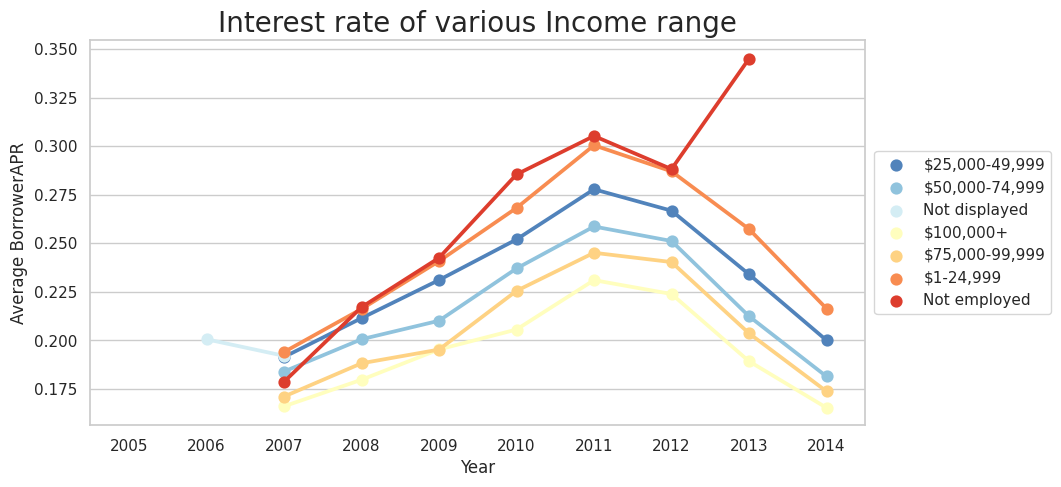

In [44]:
plt.figure(figsize=(10,5))
sns.pointplot(data=df,x='Year',y='BorrowerAPR',hue='IncomeRange',palette = 'RdYlBu_r',ci=0)
plt.ylabel('Average BorrowerAPR')
plt.title('Interest rate of various Income range',size=20)
plt.legend(loc = 'right', bbox_to_anchor=(1.25, 0.5), ncol=1);